In [631]:
import pandas as pd
import matplotlib.pyplot as plt


In [632]:
# # Montar drive google para cargar archivos del dataset
# from google.colab import drive
# drive.mount('/content/drive')


# Análisis Exploratorio Datos

### Cargar datos

In [633]:
data = pd.read_csv('dataset_elpino.csv', sep=';')
data[['GRD_CODIGO', 'GRD_DESC']] = data['GRD'].str.split('-', n=1, expand=True)

data



,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),...,Proced 26 Secundario (cod+des),Proced 27 Secundario (cod+des),Proced 28 Secundario (cod+des),Proced 29 Secundario (cod+des),Proced 30 Secundario (cod+des),Edad en años,Sexo (Desc),GRD,GRD_CODIGO,GRD_DESC
0,A41.8 - Otras septicemias especificadas,B37.6 - Endocarditis debida a candida (I39.8*),"I39.8 - Endocarditis, válvula no especificada,...",N10 - Nefritis tubulointersticial aguda,B96.1 - Klebsiella pneumoniae [K. pneumoniae] ...,L89.9 - Úlcera de decúbito y area de presión n...,L08.9 - Infección local de la piel y del tejid...,B96.2 - Escherichia coli [E. coli] como causa ...,A41.5 - Sepsis por otros organnismos Gram nega...,J86.9 - Piotórax sin fístula,...,90.42 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTIVO,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.33 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA,40,Hombre,184103 - MH SEPTICEMIA W/MCC,184103,MH SEPTICEMIA W/MCC
1,"U07.1 - COVID-19, virus identificado",J12.8 - Neumonía debida a otros virus,R06.0 - Disnea,R05 - Tos,"R50.9 - Fiebre, no especificada",Z29.0 - Aislamiento,Z01.7 - Examen de laboratorio,"J96.00 - Insuficiencia respiratoria aguda, Tip...",J94.2 - Hemotórax,J92.9 - Paquipleuritis sin asbestosis,...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,96.59 - IRRIGACION HERIDA OTRA,90.99 - EXAMEN MICROSCOPICO DIGESTIVO INFERIOR...,53,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...,041013,PH ECMO VENTILACIÓN MECÁNICA PROLONGADA CON T...
2,K56.5 - Adherencias [bridas] intestinales con ...,R57.2 - Shock séptico,R57.1 - Choque hipovolémico,J80 - Síndrome de dificultad respiratoria del ...,Y95 - Afección nosocomial,J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,B95.6 - Staphylococcus aureus como causa de en...,B96.8 - Otros agentes bacterianos especificado...,B37.1 - Candidiasis pulmonar,...,90.53 - EXAMEN MICROSCOPICO SANGRE.CULTIVO Y S...,99.26 - INYECCION TRANQUILIZANTE,89.39 - OTRAS MEDICIONES Y EXAMENES NO QUIRURG...,89.66 - GASOMETRIA VENA,89.65 - GASOMETRIA ARTERIA,65,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...,041013,PH ECMO VENTILACIÓN MECÁNICA PROLONGADA CON T...
3,K76.8 - Otras enfermedades especificadas del h...,K66.1 - Hemoperitoneo,"N18.5 - Enfermedad renal crónica, estadio 5",D64.9 - Anemia de tipo no especificado,E87.5 - Hiperpotasemia,E87.2 - Acidosis,J81 - Edema pulmonar,N17.8 - Otras insuficiencias renales agudas,J44.9 - Enfermedad pulmonar obstructiva crónic...,R41.0 - Desorientación no especificada,...,00.17 - INFUSON AGENTE VASOPRESOR,99.04 - TRANSFUSION CONCENTRADO HEMATIES,99.18 - INYECCION ELECTROLITO,99.21 - INYECCION ANTIBIOTICO,99.23 - INYECCION ESTEROIDE,61,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...,041023,PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUE...
4,T81.0 - Hemorragia y hematoma que complican un...,"Y83.2 - Operación quirúrgica con anastomosis, ...",S31.1 - Herida de la pared abdominal,S36.80 - Traumatismo de otros órganos intraabd...,W31.62 - Contacto traumático con otras maquina...,"J96.09 - Insuficiencia respiratoria aguda, Tip...",J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,"U07.1 - COVID-19, virus identificado","N39.0 - Infección de vías urinarias, sitio no ...",...,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,93.90 - RESPIRACION PRESION POSITIVA CONTINUA ...,99.15 - INFUSION PARENTERAL SUSTANCIA NUTRITIV...,96.59 - IRRIGACION HERIDA OTRA,45.13 - ESOFAGOGASTRODUODENOSCOPIA [EGD],30,Hombre,041023 - PH VENTILACIÓN MECÁNIC

### Ver cantidad de códigos unicos de diagnóstico, procedimiento y GRD

In [634]:
import numpy as np
# Convertir todos los valores del DataFrame a cadenas
codigos_unicos_diag = data.iloc[:,:35].astype(str).values.ravel()
codigos_unicos_proc = data.iloc[:,35:65].astype(str).values.ravel()
codigos_unicos_GRD = data.iloc[:,68:69].astype(str).values.ravel()

# Usar un set para obtener los valores únicos
codigos_unicos_diag = list(set(codigos_unicos_diag))
codigos_unicos_proc = list(set(codigos_unicos_proc))
codigos_unicos_GRD = list(set(codigos_unicos_GRD))
 



In [635]:
print("Procedimientos únicos:", len(codigos_unicos_proc))
print("Diagnosticos únicos:",len(codigos_unicos_diag))
print("GRD únicos:", len(codigos_unicos_GRD))

Procedimientos únicos: 904
Diagnosticos únicos: 3649
GRD únicos: 526


### Agregar cantidad de diagnósticos y procedimientos al dataset DATA

In [636]:
cuenta_diag_sec = []
cuenta_proc_sec = []

for x in range(len(data)):    
    cuenta_diag_sec.append(sum(data.iloc[x,1:35]!='-'))
    cuenta_proc_sec.append(sum(data.iloc[x,36:65]!='-'))

data["cant_diag_sec"] = cuenta_diag_sec
data["cant_proc_sec"] = cuenta_proc_sec

### Crear tabla resumen agegada por GRD, cantidad de observaciones, % de observaciones respecto del total, % acumulado de observaciones 

In [637]:
# Tabla  con conteo de grd y porcentaje respecto del total

# Calcular el recuento de cada valor único en la columna 'grd'
grd_counts = data['GRD_CODIGO'].value_counts()

# Calcular el porcentaje de cada valor unico en la columna GRD
grd_percentages = (grd_counts / len(data)) * 100

# Crear un nuevo dataframe con las cantidades y porcentajes
grd_summary = pd.DataFrame({'Count': grd_counts, 'Percentage': grd_percentages})

# Calculate the cumulative percentage of the 'GRD_CODIGO' counts
grd_summary['Cumulative Percentage'] = grd_summary['Percentage'].cumsum()

grd_summary['contador'] = range(1, len(grd_summary) + 1)
grd_summary=grd_summary.reset_index()
grd_summary


,GRD_CODIGO,Count,Percentage,Cumulative Percentage,contador
0,146101,813,5.583408,5.583408,1
1,146121,639,4.388435,9.971843,2
2,146131,538,3.694801,13.666644,3
3,158171,389,2.671520,16.338164,4
4,134161,325,2.231990,18.570153,5
...,...,...,...,...,...
521,201103,1,0.006868,99.972529,522
522,091403,1,0.006868,99.979397,523
523,084201,1,0.006868,99.986265,524
524,204103,1,0.006868,99.993132,525


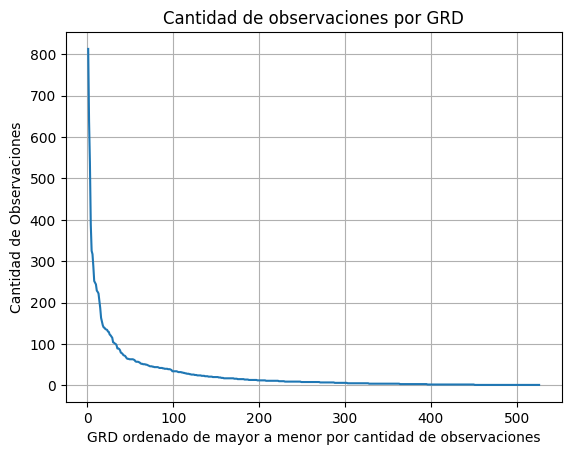

In [638]:

plt.plot( grd_summary['contador'], grd_summary['Count'])

# Etiquetas y título
plt.xlabel('GRD ordenado de mayor a menor por cantidad de observaciones')
plt.ylabel('Cantidad de Observaciones')
plt.title('Cantidad de observaciones por GRD')

plt.grid(True)
plt.show()

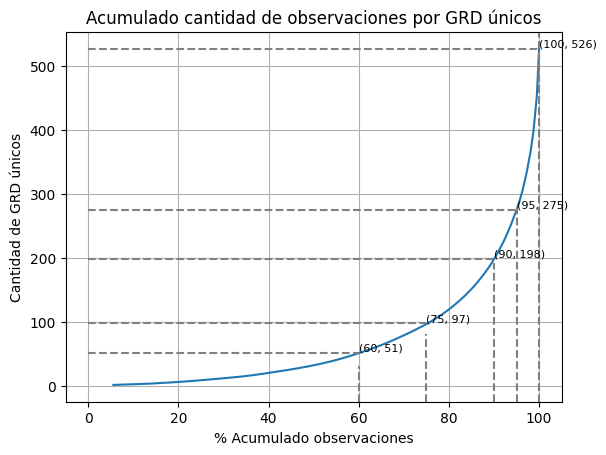

In [639]:
plt.plot(grd_summary['Cumulative Percentage'], grd_summary['contador'])

# Etiquetas y título
plt.xlabel('% Acumulado observaciones')
plt.ylabel('Cantidad de GRD únicos')
plt.title('Acumulado cantidad de observaciones por GRD únicos')

# Agregar las líneas punteadas para x = 80, 85 y 90
for x_val in [60, 75, 90, 95, 100]:
    y_val = grd_summary.loc[grd_summary['Cumulative Percentage'] >= x_val, 'contador'].iloc[0]
    plt.axvline(x=x_val, ymax=y_val/max(grd_summary['contador']), color='gray', linestyle='--')  # Línea vertical punteada
    plt.hlines(y=y_val, xmin=0, xmax=x_val, color='gray', linestyle='--')  # Línea horizontal punteada hasta eje Y
    plt.text(x_val, y_val, f'({x_val}, {int(y_val)})', color='black', fontsize=8, verticalalignment='bottom')


# Mostrar la cuadrícula y el gráfico
plt.grid(True)
plt.show()


### Crear dataset filtrado

In [640]:
pd.DataFrame(grd_summary[grd_summary['Count']==1])

,GRD_CODIGO,Count,Percentage,Cumulative Percentage,contador
450,084123,1,0.006868,99.484925,451
451,134101,1,0.006868,99.491793,452
452,184131,1,0.006868,99.498661,453
453,021302,1,0.006868,99.505528,454
454,081503,1,0.006868,99.512396,455
...,...,...,...,...,...
521,201103,1,0.006868,99.972529,522
522,091403,1,0.006868,99.979397,523
523,084201,1,0.006868,99.986265,524
524,204103,1,0.006868,99.993132,525


In [641]:
grd_summary['GRD_CODIGO'][(grd_summary['Cumulative Percentage'] > 75) & (grd_summary['Count'] > 20)]

96     061122 
97     134131 
98     081023 
99     064173 
100    081022 
101    158172 
102    111202 
103    131302 
104    054153 
105    044172 
106    044201 
107    074143 
108    121101 
109    094122 
110    074131 
111    194111 
112    081302 
113    124111 
114    054201 
115    081021 
116    194141 
117    034131 
118    224122 
119    146111 
120    158133 
121    164133 
122    094132 
123    014222 
124    164132 
125    158161 
126    054191 
127    164131 
128    044111 
129    158143 
130    131203 
131    061142 
132    054121 
133    044202 
134    054193 
135    041202 
136    061133 
137    091502 
138    194102 
139    158122 
140    194132 
141    061401 
142    074122 
143    214162 
144    111401 
Name: GRD_CODIGO, dtype: object

In [642]:
# Resto de los datos filtrado: 25% restante quitando los GRD que tienen solo 1 observación
# data_filtrada = data[data['GRD_CODIGO'].isin(grd_summary['GRD_CODIGO'][(grd_summary['Cumulative Percentage'] > 75) & (grd_summary['Count'] > 10)])].copy()

data_filtrada = data[data['GRD_CODIGO'].isin(grd_summary['GRD_CODIGO'][grd_summary['Cumulative Percentage'] <= 75])].copy()

data_filtrada = data_filtrada.replace('-', np.nan)
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10918 entries, 0 to 14560
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Diag 01 Principal (cod+des)     10918 non-null  object
 1   Diag 02 Secundario (cod+des)    9912 non-null   object
 2   Diag 03 Secundario (cod+des)    8757 non-null   object
 3   Diag 04 Secundario (cod+des)    7707 non-null   object
 4   Diag 05 Secundario (cod+des)    6828 non-null   object
 5   Diag 06 Secundario (cod+des)    6198 non-null   object
 6   Diag 07 Secundario (cod+des)    5537 non-null   object
 7   Diag 08 Secundario (cod+des)    4687 non-null   object
 8   Diag 09 Secundario (cod+des)    3843 non-null   object
 9   Diag 10 Secundario (cod+des)    3072 non-null   object
 10  Diag 11 Secundario (cod+des)    2361 non-null   object
 11  Diag 12 Secundario (cod+des)    1814 non-null   object
 12  Diag 13 Secundario (cod+des)    1405 non-null   obj

In [643]:
data_filtrada['GRD_CODIGO'].value_counts()

GRD_CODIGO
146101     813
146121     639
146131     538
158171     389
134161     325
          ... 
074121      40
094121      40
044161      39
134121      39
114132      39
Name: count, Length: 96, dtype: int64

### Análisis de cantidad de diagnósticos y procedimientos por observación

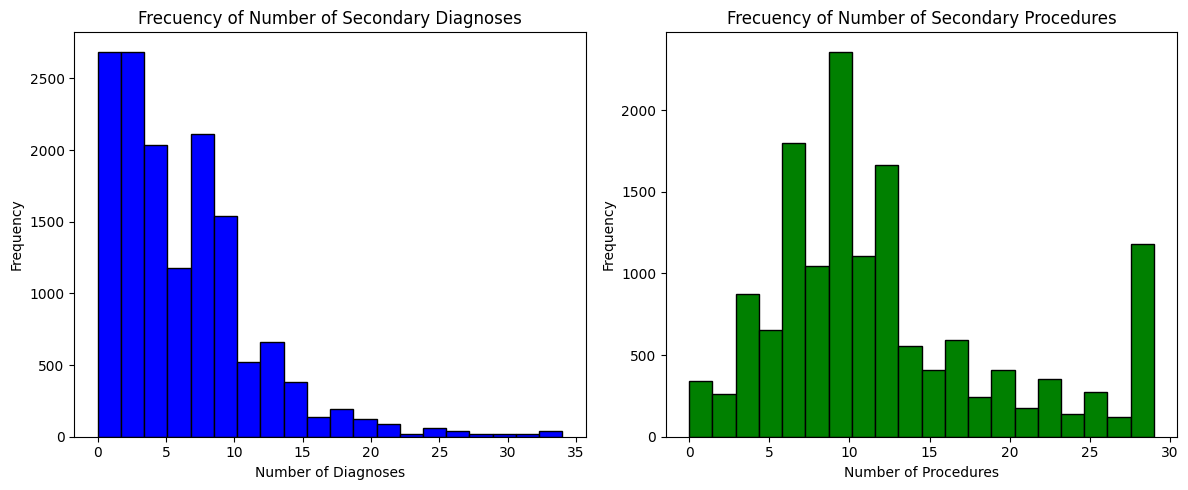

In [644]:
import matplotlib.pyplot as plt

# Crear la figura con 2 gráficos uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Primer histograma para 'cant_diag_sec'
ax1.hist(data['cant_diag_sec'], bins=20, color='blue', edgecolor='black')
ax1.set_title('Frecuency of Number of Secondary Diagnoses')
ax1.set_xlabel('Number of Diagnoses')
ax1.set_ylabel('Frequency')

# Segundo histograma para 'cant_proc_sec'
ax2.hist(data['cant_proc_sec'], bins=20, color='green', edgecolor='black')
ax2.set_title('Frecuency of Number of Secondary Procedures')
ax2.set_xlabel('Number of Procedures')
ax2.set_ylabel('Frequency')

# Ajustar el layout para que no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()


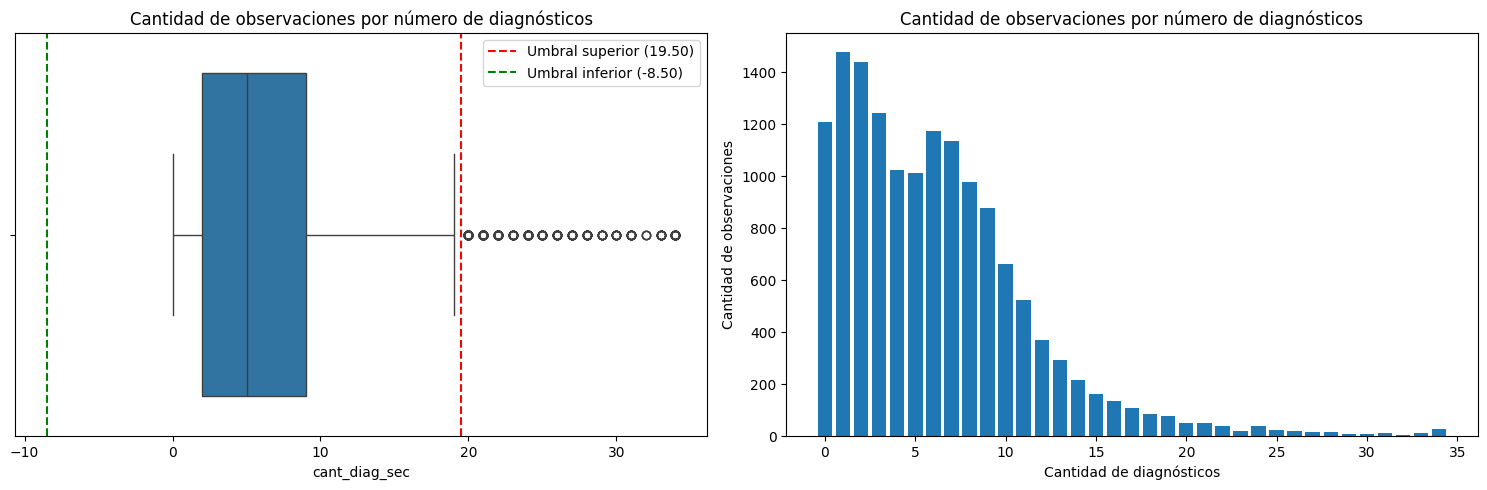

In [645]:
import seaborn as sns
# Crear el gráfico con un boxplot y un gráfico de barras al lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# --- Boxplot ---
sns.boxplot(data=data['cant_diag_sec'], orient='h', ax=ax1)

# Calcular Q1, Q3, IQR y umbrales de outliers
Q1 = np.percentile(data['cant_diag_sec'], 25)
Q3 = np.percentile(data['cant_diag_sec'], 75)
IQR = Q3 - Q1
outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR

# Añadir líneas para los umbrales de outliers
ax1.axvline(outlier_threshold_upper, color='r', linestyle='--', label=f'Umbral superior ({outlier_threshold_upper:.2f})')
ax1.axvline(outlier_threshold_lower, color='g', linestyle='--', label=f'Umbral inferior ({outlier_threshold_lower:.2f})')

# Título y leyenda
ax1.set_title('Cantidad de observaciones por número de diagnósticos')
ax1.legend()

# --- Gráfico de barras ---
# Contar la cantidad de observaciones por cada valor de 'cant_diag_sec'
counts = data['cant_diag_sec'].value_counts().sort_index()

# Crear el gráfico de barras
ax2.bar(counts.index, counts.values)
ax2.set_title('Cantidad de observaciones por número de diagnósticos')
ax2.set_xlabel('Cantidad de diagnósticos')
ax2.set_ylabel('Cantidad de observaciones')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


### Limpiar la descripción de los diagnósticos y procedimientos

In [646]:
import pandas as pd

# Función para extraer solo el código antes del guion
def extract_code(col):
    return col.str.split(' - ').str[0]  # Divide el string y toma solo la parte antes del guion

# Aplicar la extracción de códigos a todas las columnas de diagnóstico y procedimiento
def remove_descriptions(data):
    diag_cols = [col for col in data.columns if 'Diag' in col]  # Todas las columnas de diagnósticos
    proc_cols = [col for col in data.columns if 'Proced' in col]  # Todas las columnas de procedimientos

    # Remover descripciones de las columnas de diagnóstico
    for col in diag_cols:
        data[col] = extract_code(data[col])

    # Remover descripciones de las columnas de procedimiento
    for col in proc_cols:
        data[col] = extract_code(data[col])

    return data

# Aplicar la limpieza al dataset
data_filtrada_clean = remove_descriptions(data_filtrada.copy())

In [647]:
data_filtrada_clean

,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),...,Proced 28 Secundario (cod+des),Proced 29 Secundario (cod+des),Proced 30 Secundario (cod+des),Edad en años,Sexo (Desc),GRD,GRD_CODIGO,GRD_DESC,cant_diag_sec,cant_proc_sec
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,...,91.39,91.33,87.03,40,Hombre,184103 - MH SEPTICEMIA W/MCC,184103,MH SEPTICEMIA W/MCC,27,29
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,...,91.32,96.59,90.99,53,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...,041013,PH ECMO VENTILACIÓN MECÁNICA PROLONGADA CON T...,16,29
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,...,89.39,89.66,89.65,65,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...,041013,PH ECMO VENTILACIÓN MECÁNICA PROLONGADA CON T...,31,29
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,99.18,99.21,99.23,61,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...,041023,PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUE...,18,29
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,99.15,96.59,45.13,30,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...,041023,PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUE...,21,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14553,O23.1,O23.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26,Mujer,134161 - MH TRASTORNOS DEL ANTEPARTO,134161,MH TRASTORNOS DEL ANTEPARTO,1,9
14555,L03.1,I10,E11.9,E66.9,F17.2,Z88.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,48,Hombre,094121 - MH CELULITIS,094121,MH CELULITIS,5,7
14556,E10.1,J45.9,F10.2,F17.2,Z91.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26,Mujer,104101 - MH DIABETES Y ENFERMEDADES METABÓLICA...,104101,MH DIABETES Y ENFERMEDADES METABÓLICAS Y NUTR...,4,9
14558,K92.1,I10,E11.9,I50.9,K25.9,M16.9,G47.3,Z99.8,NaN,NaN,...,NaN,NaN,NaN,58,Hombre,064182 - MH OTROS DIAGNÓSTICOS SOBRE APARATO D...,064182,MH OTROS DIAGNÓSTICOS SOBRE APARATO DIGESTIVO...,7,5


## Clusterización para dividir en grupos

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_18508\3329541293.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_cluster['Sexo (Desc)'] = variables_cluster['Sexo (Desc)'].map({'Hombre': 0, 'Mujer': 1})


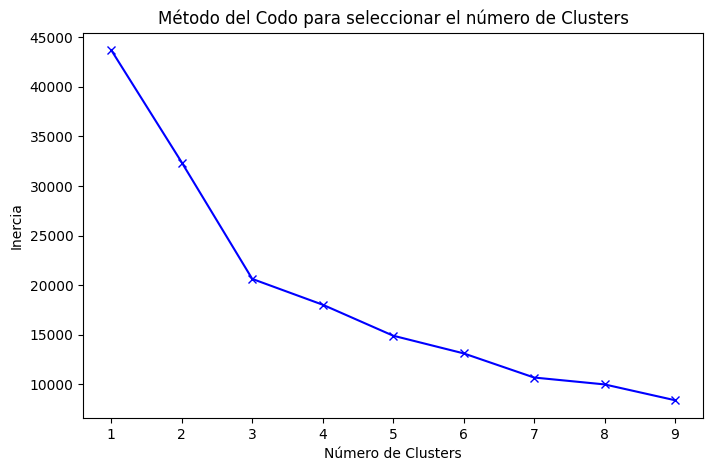

In [648]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar las variables para la clusterización

variables_cluster = data_filtrada_clean[['cant_diag_sec', 'cant_proc_sec', 'Edad en años', 'Sexo (Desc)']]

# Convertir el sexo en variable numérica (si es categórica)
variables_cluster['Sexo (Desc)'] = variables_cluster['Sexo (Desc)'].map({'Hombre': 0, 'Mujer': 1})

# Escalar las variables numéricas
scaler = StandardScaler()
variables_scaled = scaler.fit_transform(variables_cluster)

# Aplicar K-Means para varios números de clusters para encontrar el óptimo
inertia = []
K = range(1, 10)  # Probar con hasta 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(variables_scaled)
    inertia.append(kmeans.inertia_)

# Método del codo para elegir el número óptimo de clusters
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para seleccionar el número de Clusters')
plt.show()

# Suponiendo que elijes k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(variables_scaled)

# Añadir los clusters al dataset original
data_cluster = data_filtrada_clean.copy()
data_cluster['cluster'] = clusters


In [649]:
len(data), len(data_filtrada), len(data_filtrada_clean), len(data_cluster)

(14561, 10918, 10918, 10918)

In [650]:
grd_cluster = data_cluster['GRD_CODIGO'][data_cluster['cluster']==0].value_counts() # contador de GRD segun filtro de cluster
grd_cluster = grd_cluster.reset_index() # Resetea index para que quede el GRD_CODIGO como columna
data_cluster_0 = data_cluster[data_cluster['cluster']==0] # Crea variable cluster_0 con la data filtrada por cluster
data_cluster_0 = data_cluster_0[data_cluster['GRD_CODIGO'].isin(grd_cluster['GRD_CODIGO'][grd_cluster['count']>1])] # Elimina los GRD_CODIGO que tienen 1 sola observacion en en el cluster 0
data_cluster_0


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_18508\856732357.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cluster_0 = data_cluster_0[data_cluster['GRD_CODIGO'].isin(grd_cluster['GRD_CODIGO'][grd_cluster['count']>1])] # Elimina los GRD_CODIGO que tienen 1 sola observacion en en el cluster 0


,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),...,Proced 29 Secundario (cod+des),Proced 30 Secundario (cod+des),Edad en años,Sexo (Desc),GRD,GRD_CODIGO,GRD_DESC,cant_diag_sec,cant_proc_sec,cluster
36,G40.9,Z04.6,F09,F70.9,Z59.7,Z91.1,NaN,NaN,NaN,NaN,...,NaN,NaN,46,Hombre,014221 - MH CONVULSIONES,014221,MH CONVULSIONES,5,12,0
74,K85.9,E11.9,K76.0,K42.9,N40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,57,Hombre,074121 - MH ENFERMEDADES DE PÁNCREAS EXCEPTO N...,074121,MH ENFERMEDADES DE PÁNCREAS EXCEPTO NEOPLASIAS,4,11,0
79,E11.7,N04.8,N17.9,I10,D50.8,E87.1,E88.0,H54.3,NaN,NaN,...,NaN,NaN,39,Hombre,104102 - MH DIABETES Y ENFERMEDADES METABÓLICA...,104102,MH DIABETES Y ENFERMEDADES METABÓLICAS Y NUTR...,7,17,0
86,I63.8,I10,Z86.4,Z72.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54,Hombre,014141 - MH ACCIDENTE CEREBROVASCULAR CON INFARTO,014141,MH ACCIDENTE CEREBROVASCULAR CON INFARTO,3,20,0
105,I21.0,I25.1,I10,I80.8,I77.1,E11.9,A09.9,NaN,NaN,NaN,...,NaN,NaN,60,Hombre,054102 - MH INFARTO AGUDO DE MIOCARDIO W/CC,054102,MH INFARTO AGUDO DE MIOCARDIO W/CC,6,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14544,P70.4,P59.9,P61.6,P05.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,Hombre,"158132 - MH NEONATO, PESO AL NACER 2000-2499 G...",158132,"MH NEONATO, PESO AL NACER 2000-2499 GR SIN PR...",3,6,0
14545,S06.20,W22.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7,Hombre,014241 - MH TRAUMATISMO CEFÁLICO,014241,MH TRAUMATISMO CEFÁLICO,1,2,0
14550,K92.2,K70.4,E87.2,E87.3,D69.6,F17.2,F10.2,Z92.4,NaN,NaN,...,NaN,NaN,46,Hombre,064183 - MH OTROS DIAGNÓSTICOS SOBRE APARATO D...,064183,MH OTROS DIAGNÓSTICOS SOBRE APARATO DIGESTIVO...,7,7,0
14555,L03.1,I10,E11.9,E66.9,F17.2,Z88.0,NaN,NaN,NaN,NaN,...,NaN,NaN,48,Hombre,094121 - MH CELULITIS,094121,MH CELULITIS,5,7,0


In [651]:
data_cluster['cluster'].value_counts()

cluster
1    6828
0    2211
2    1879
Name: count, dtype: int64

In [652]:
# data_filtrada_clean = data_cluster_0.copy()

In [653]:
# data_filtrada_clean['GRD_CODIGO'].value_counts()

# Modelos

In [654]:
data_filtrada_clean['GRD_CODIGO'].value_counts(ascending=True)

GRD_CODIGO
044161      39
114132      39
134121      39
114103      40
074121      40
          ... 
134161     325
158171     389
146131     538
146121     639
146101     813
Name: count, Length: 96, dtype: int64

In [655]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Hiperparámetros
# MAX_DIAG was 36, but the actual number of diagnosis columns is 35.
# Changing to 35 to match the data.
MAX_DIAG = 35  # Diag 01 Principal + 35 secundarios
MAX_PROCED = 30  # Proced 01 Principal + 30 secundarios
EMBEDDING_DIM = 128  # Dimensión de los embeddings
LSTM_UNITS = 32  # Número de unidades LSTM o GRU
NUM_CLASSES = len(data_filtrada['GRD'].unique())  # Número de clases GRD
BATCH_SIZE = 32
EPOCHS = 20

In [656]:
# Construir el modelo con LSTM
def build_model(embedding_dim=128, lstm_units=64, num_diagnoses_codes=10000, num_procedures_codes=5000):
    # Entrada para diagnósticos
    diag_input = Input(shape=(MAX_DIAG,), name="diagnoses_input")
    diag_embedding = Embedding(input_dim=num_diagnoses_codes + 1, output_dim=embedding_dim, mask_zero=True)(diag_input)
    diag_lstm = LSTM(lstm_units, return_sequences=False)(diag_embedding)

    # Entrada para procedimientos
    proc_input = Input(shape=(MAX_PROCED,), name="procedures_input")
    proc_embedding = Embedding(input_dim=num_procedures_codes + 1, output_dim=embedding_dim, mask_zero=True)(proc_input)
    proc_lstm = LSTM(lstm_units, return_sequences=False)(proc_embedding)

    # Concatenación de salidas LSTM
    concatenated = tf.keras.layers.concatenate([diag_lstm, proc_lstm])

    # Dropout para evitar sobreajuste
    dropout_layer = Dropout(0.5)(concatenated)

    # Capa densa y de salida
    dense_output = Dense(128, activation="relu")(dropout_layer)
    output = Dense(NUM_CLASSES, activation="softmax")(dense_output)

    # Compilar el modelo
    model = Model(inputs=[diag_input, proc_input], outputs=output)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model



In [657]:
# Preprocesamiento de los datos
def preprocess_data(data_filtrada):
    # Extraer los diagnósticos y procedimientos
    diagnosis_columns = [col for col in data_filtrada.columns if 'Diag' in col]
    procedure_columns = [col for col in data_filtrada.columns if 'Proced' in col]

    # Codificar diagnósticos y procedimientos con LabelEncoder
    label_encoders_diag = {}
    for col in diagnosis_columns:
        le = LabelEncoder()
        data_filtrada[col] = le.fit_transform(data_filtrada[col].astype(str))
        label_encoders_diag[col] = le  # Guardar el codificador por si es necesario para decodificar más tarde

    label_encoders_proc = {}
    for col in procedure_columns:
        le = LabelEncoder()
        data_filtrada[col] = le.fit_transform(data_filtrada[col].astype(str))
        label_encoders_proc[col] = le

    X_diagnoses = data_filtrada[diagnosis_columns].values
    X_procedures = data_filtrada[procedure_columns].values

    # Codificar las etiquetas (GRD)
    label_encoder_grd = LabelEncoder()
    y_grd = label_encoder_grd.fit_transform(data_filtrada['GRD'])

    return X_diagnoses, X_procedures, y_grd, label_encoders_diag, label_encoders_proc


In [658]:
# Dividir los datos en conjunto de entrenamiento y prueba
def split_data(X_diagnoses, X_procedures, y_grd):
    return train_test_split(X_diagnoses, X_procedures, y_grd, test_size=0.2, random_state=42, stratify=y_grd)


# Preparar los datos
X_diagnoses, X_procedures, y_grd, label_encoders_diag, label_encoders_proc = preprocess_data(data_filtrada_clean.copy())

# Dividir los datos
X_diag_train, X_diag_test, X_proc_train, X_proc_test, y_train, y_test = split_data(X_diagnoses, X_procedures, y_grd)

# Definir número de códigos únicos para embeddings
num_diagnoses_codes = int(np.max(X_diagnoses)) + 1
num_procedures_codes = int(np.max(X_procedures)) + 1

In [659]:
# Crear early stop para mi modelo

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [660]:
# Construir el modelo
model = build_model(embedding_dim=EMBEDDING_DIM, lstm_units=LSTM_UNITS,
                    num_diagnoses_codes=num_diagnoses_codes, num_procedures_codes=num_procedures_codes)
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ diagnoses_input     │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ procedures_input    │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_90        │ (None, 35, 128)   │    161,408 │ diagnoses_input[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_36        │ (None, 35)        │          0 │ diagnoses_input[… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_91        │ (None, 30, 128)   │     49,792 │ procedures_input… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_37        │ (None, 30)        │          0 │ procedures_input… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_72 (LSTM)      │ (None, 32)        │     20,608 │ embedding_90[0][… │
│                     │                   │            │ not_equal_36[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_73 (LSTM)      │ (None, 32)        │     20,608 │ embedding_91[0][… │
│                     │                   │            │ not_equal_37[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_27      │ (None, 64)        │          0 │ lstm_72[0][0],    │
│ (Concatenate)       │                   │            │ lstm_73[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 64)        │          0 │ concatenate_27[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 128)       │      8,320 │ dropout_27[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 96)        │     12,384 │ dense_54[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 273,120 (1.04 MB)

 Trainable params: 273,120 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [661]:
# Entrenamiento del modelo
history = model.fit(
    [X_diag_train, X_proc_train],
    y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,callbacks=[early_stopping]
)


Epoch 1/20


c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['diagnoses_input', 'procedures_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.0751 - loss: 4.2306 - val_accuracy: 0.1231 - val_loss: 3.4113
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.1835 - loss: 3.2606 - val_accuracy: 0.2553 - val_loss: 2.8949
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.2802 - loss: 2.8019 - val_accuracy: 0.3331 - val_loss: 2.6996
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.3272 - loss: 2.5956 - val_accuracy: 0.3549 - val_loss: 2.4666
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.3696 - loss: 2.3448 - val_accuracy: 0.3824 - val_loss: 2.3305
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.3998 - loss: 2.1241 - val_accuracy: 0.4076 - val_loss: 2.2625
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.4369 - loss: 1.9720 - val_accuracy: 0.4522 - val_loss: 2.1283
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.4670 - loss: 1.8742 - val_accuracy:

In [662]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate([X_diag_test, X_proc_test], y_test)
print(f"Test Accuracy: {test_acc:.4f}")
# print(f"Test Loss: {test_loss:.4f}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4900 - loss: 2.0769
Test Accuracy: 0.4840


In [663]:
from sklearn.metrics import precision_score, f1_score, roc_auc_score, recall_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict([X_diag_test, X_proc_test])

# Convertir las probabilidades predichas en clases
y_pred_classes_1 = np.argmax(y_pred, axis=1)

# AUC/ROC: Para multiclase, se hace "one-vs-rest"
# y_test_binarized = label_binarize(y_test, classes=np.arange(NUM_CLASSES))  # Binarizar etiquetas para calcular AUC por clase
# auc = roc_auc_score(y_test_binarized, y_pred, average='macro', multi_class='ovr')

precision_macro1, recall_macro1, fscore_macro1, x=precision_recall_fscore_support(y_test, y_pred_classes_1, average='weighted', zero_division=0.0)

# # Mostrar las métricas
# print(f"Precision (Weighted): {precision:.4f}")
# print(f"F1-Score (Weighted): {f1:.4f}")
# print(f"AUC-ROC (Weighted): {auc:.4f}")
# print(f"Recall (Weighted): {recall:.4f}")

print(f"Presición (weighted): {precision_macro1:.4f}")
print(f"Recall (weighted): {recall_macro1:.4f}")
print(f"FScore (weighted): {fscore_macro1:.4f}")

compara_rendimiento=pd.DataFrame()
compara_rendimiento['model1']=[precision_macro1,recall_macro1,fscore_macro1]




69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Presición (weighted): 0.4449
Recall (weighted): 0.4840
FScore (weighted): 0.4444


In [664]:
compara_rendimiento

,model1
0,0.444903
1,0.483974
2,0.444434


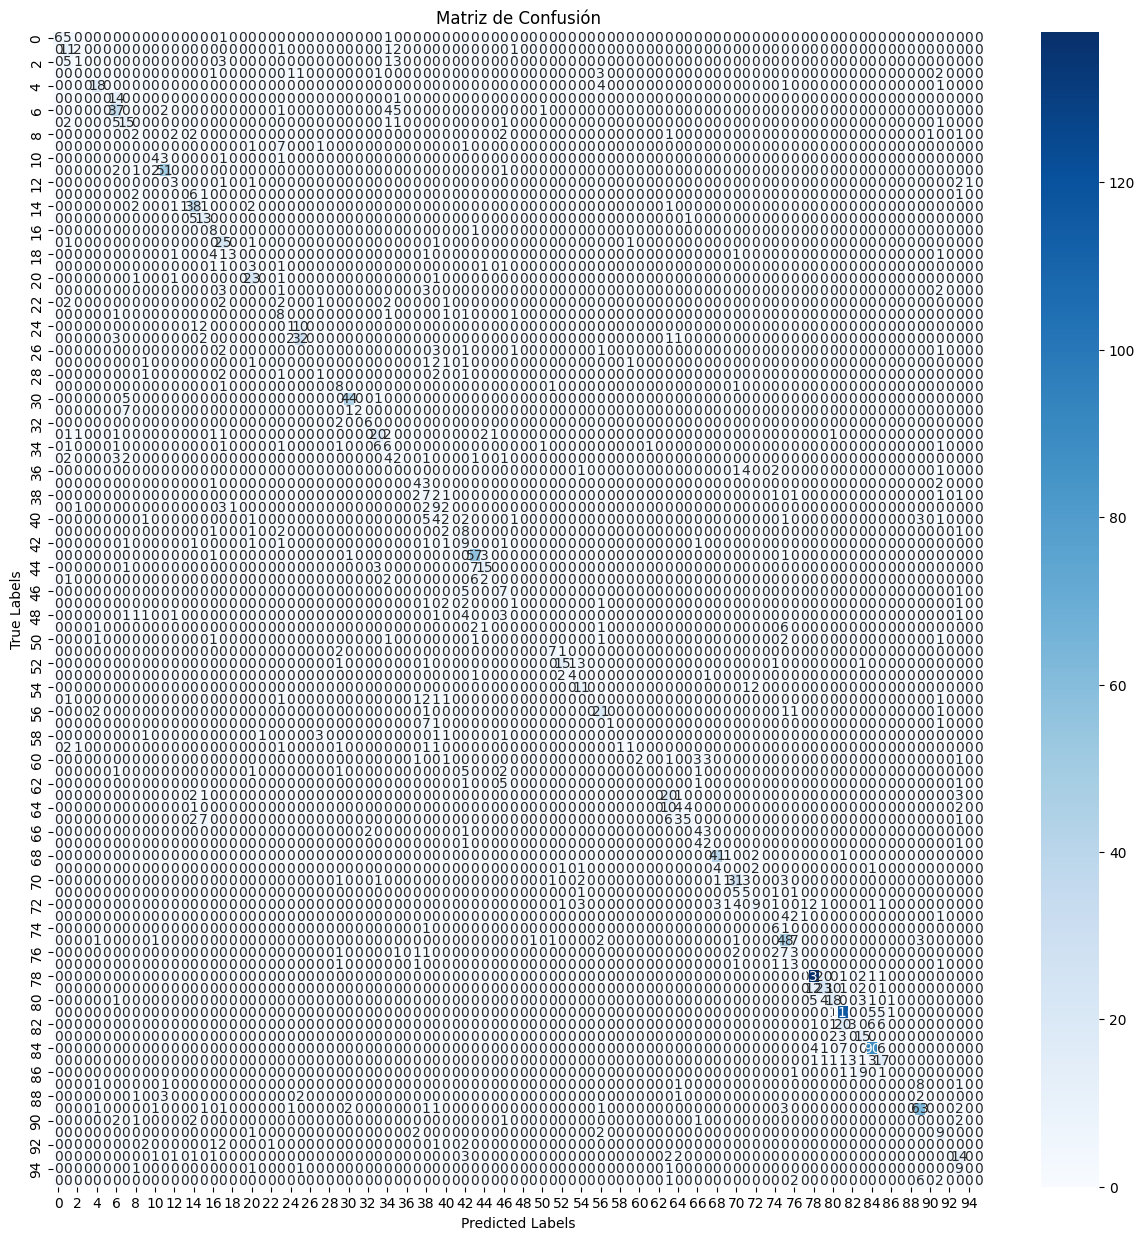

In [665]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [666]:
# from sklearn.metrics import roc_curve, auc
# from itertools import cycle

# # Binarizar las etiquetas
# y_test_binarized = label_binarize(y_test, classes=np.arange(NUM_CLASSES))

# # Calculamos las curvas ROC para cada clase
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(NUM_CLASSES):
#     fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Graficar la curva ROC para cada clase
# plt.figure(figsize=(20, 7))
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown'])
# for i, color in zip(range(NUM_CLASSES), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Curvas ROC multiclase')
# plt.legend(loc="lower right")
# plt.show()


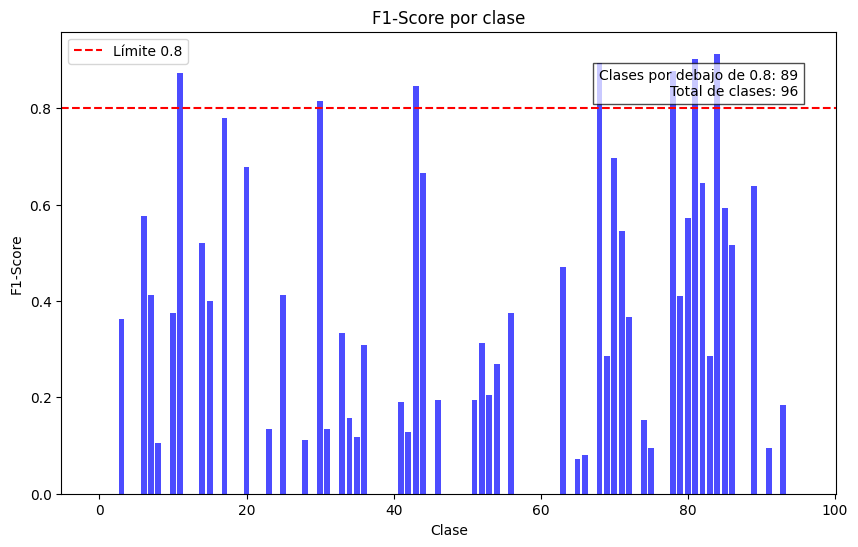

In [667]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Obtener el F1-Score para cada clase
f1_per_class = f1_score(y_test, y_pred_classes_1, average=None)

# Definir el valor de corte (0.8) y contar cuántas clases están por debajo de ese valor
threshold = 0.8
below_threshold = np.sum(f1_per_class < threshold)
total_classes = len(f1_per_class)

# Graficar F1-Score para cada clase
plt.figure(figsize=(10, 6))
plt.bar(np.arange(total_classes), f1_per_class, color='blue', alpha=0.7)

# Agregar una línea punteada en el valor 0.8
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Límite 0.8')

# Mostrar el número de clases debajo del umbral en el gráfico
plt.text(total_classes - 1, threshold + 0.02, f'Clases por debajo de {threshold}: {below_threshold}\nTotal de clases: {total_classes}', 
         verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Configurar el gráfico
plt.xlabel('Clase')
plt.ylabel('F1-Score')
plt.title('F1-Score por clase')
plt.legend()

# Mostrar el gráfico
plt.show()



In [668]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parámetros del modelo
MAX_DIAG_SECUNDARIOS = 34  # Máximo número de diagnósticos secundarios
MAX_PROC_SECUNDARIOS = 29  # Máximo número de procedimientos secundarios

# Preprocesamiento de los datos
def preprocess_data2(data):
    # --- Separar las columnas de interés ---
    diag_principal_col = 'Diag 01 Principal (cod+des)'
    proc_principal_col = 'Proced 01 Principal (cod+des)'
    
    diag_secundarios_cols = [f'Diag {i:02d} Secundario (cod+des)' for i in range(2, MAX_DIAG_SECUNDARIOS + 1)]
    proc_secundarios_cols = [f'Proced {i:02d} Secundario (cod+des)' for i in range(2, MAX_PROC_SECUNDARIOS + 1)]
    
    # --- Codificar diagnósticos y procedimientos ---
    # Usamos LabelEncoder para convertir los códigos 'cod+des' en números
    diag_encoder = LabelEncoder()
    proc_encoder = LabelEncoder()
    
    # --- Codificar diagnósticos principales ---
    data[diag_principal_col] = diag_encoder.fit_transform(data[diag_principal_col].astype(str))
    
    # --- Codificar procedimientos principales ---
    data[proc_principal_col] = proc_encoder.fit_transform(data[proc_principal_col].astype(str))
    
    # --- Codificar diagnósticos secundarios ---
    for col in diag_secundarios_cols:
        data[col] = diag_encoder.fit_transform(data[col].fillna('0').astype(str))  # Rellenar NaN con '0'
    
    # --- Codificar procedimientos secundarios ---
    for col in proc_secundarios_cols:
        data[col] = proc_encoder.fit_transform(data[col].fillna('0').astype(str))  # Rellenar NaN con '0'
    
    # --- Obtener las columnas relevantes ---
    diag_principal = data[diag_principal_col].values
    proc_principal = data[proc_principal_col].values
    diag_secundarios = data[diag_secundarios_cols].values
    proc_secundarios = data[proc_secundarios_cols].values
    
    # --- Codificar la variable objetivo (GRD) ---
    grd_encoder = LabelEncoder()
    grd_labels = grd_encoder.fit_transform(data['GRD'])
    
    # --- Rellenar y truncar secuencias para diagnósticos y procedimientos secundarios ---
    diag_secundarios_padded = pad_sequences(diag_secundarios, maxlen=MAX_DIAG_SECUNDARIOS, padding='post', truncating='post')
    proc_secundarios_padded = pad_sequences(proc_secundarios, maxlen=MAX_PROC_SECUNDARIOS, padding='post', truncating='post')

    return diag_principal, proc_principal, diag_secundarios_padded, proc_secundarios_padded, grd_labels, diag_encoder, proc_encoder, grd_encoder



In [669]:
# Aplicar preprocesamiento
diag_principal, proc_principal, diag_secundarios_padded, proc_secundarios_padded, grd_labels, diag_encoder, proc_encoder, grd_encoder = preprocess_data2(data_filtrada_clean.copy())

# División de datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train_diag_principal, X_test_diag_principal, X_train_proc_principal, X_test_proc_principal, \
X_train_diag_sec, X_test_diag_sec, X_train_proc_sec, X_test_proc_sec, y_train, y_test = train_test_split(
    diag_principal, proc_principal, diag_secundarios_padded, proc_secundarios_padded, grd_labels, test_size=0.2, random_state=42, stratify=grd_labels
)


In [670]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

# Hiperparámetros
embedding_dim = 128
lstm_units = 64
num_diagnoses_codes = 5000  # Número de códigos únicos de diagnósticos
num_procedures_codes = 2000  # Número de códigos únicos de procedimientos

# Entrada de diagnóstico principal
diag_principal_input = Input(shape=(1,), name="diag_principal_input")
diag_principal_embedding = Embedding(input_dim=num_diagnoses_codes + 1, output_dim=embedding_dim)(diag_principal_input)
diag_principal_lstm = LSTM(lstm_units, return_sequences=False)(diag_principal_embedding)

# Entrada de procedimiento principal
proc_principal_input = Input(shape=(1,), name="proc_principal_input")
proc_principal_embedding = Embedding(input_dim=num_procedures_codes + 1, output_dim=embedding_dim)(proc_principal_input)
proc_principal_lstm = LSTM(lstm_units, return_sequences=False)(proc_principal_embedding)

# Entrada de diagnósticos secundarios (secuencia de diagnósticos secundarios)
diag_secundarios_input = Input(shape=(MAX_DIAG_SECUNDARIOS,), name="diag_secundarios_input")
diag_secundarios_embedding = Embedding(input_dim=num_diagnoses_codes + 1, output_dim=embedding_dim)(diag_secundarios_input)
diag_secundarios_lstm = LSTM(lstm_units, return_sequences=False)(diag_secundarios_embedding)

# Entrada de procedimientos secundarios (secuencia de procedimientos secundarios)
proc_secundarios_input = Input(shape=(MAX_PROC_SECUNDARIOS,), name="proc_secundarios_input")
proc_secundarios_embedding = Embedding(input_dim=num_procedures_codes + 1, output_dim=embedding_dim)(proc_secundarios_input)
proc_secundarios_lstm = LSTM(lstm_units, return_sequences=False)(proc_secundarios_embedding)

# Concatenar las salidas de las LSTM
concatenated = Concatenate()([diag_principal_lstm, proc_principal_lstm, diag_secundarios_lstm, proc_secundarios_lstm])

# Añadir una capa Dropout para evitar el sobreajuste
dropout_layer = Dropout(0.2)(concatenated)

# Capa densa para combinar las características aprendidas
dense_output = Dense(128, activation="relu")(dropout_layer)

# Capa de salida con softmax para clasificación multiclase
output = Dense(NUM_CLASSES, activation="softmax")(dense_output)

# Compilar el modelo
model2 = Model(inputs=[diag_principal_input, proc_principal_input, diag_secundarios_input, proc_secundarios_input], outputs=output)
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Resumen del modelo
model2.summary()



Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ diag_principal_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ proc_principal_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_secundarios_i… │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ proc_secundarios_i… │ (None, 29)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_92        │ (None, 1, 128)    │    640,128 │ diag_principal_i… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_93        │ (None, 1, 128)    │    256,128 │ proc_principal_i… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_94        │ (None, 34, 128)   │    640,128 │ diag_secundarios… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_95        │ (None, 29, 128)   │    256,128 │ proc_secundarios… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_74 (LSTM)      │ (None, 64)        │     49,408 │ embedding_92[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_75 (LSTM)      │ (None, 64)        │     49,408 │ embedding_93[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_76 (LSTM)      │ (None, 64)        │     49,408 │ embedding_94[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_77 (LSTM)      │ (None, 64)        │     49,408 │ embedding_95[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_28      │ (None, 256)       │          0 │ lstm_74[0][0],    │
│ (Concatenate)       │                   │            │ lstm_75[0][0],    │
│                     │                   │            │ lstm_76[0][0],    │
│                     │                   │            │ lstm_77[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 256)       │          0 │ concatenate_28[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 128)       │     32,896 │ dropout_28[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_57 (Dense)    │ (None, 96)        │     12,384 │ dense_56[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,035,424 (7.76 MB)

 Trainable params: 2,035,424 (7.76 MB)

 Non-trainable params: 0 (0.00 B)

In [671]:
# Crear early stop para mi modelo

from tensorflow.keras.callbacks import EarlyStopping
early_stopping2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [672]:
history2 = model2.fit(
    [X_train_diag_principal, X_train_proc_principal, X_train_diag_sec, X_train_proc_sec],
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32, callbacks=[early_stopping2]
)


Epoch 1/20


c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['diag_principal_input', 'proc_principal_input', 'diag_secundarios_input', 'proc_secundarios_input']. Received: the structure of inputs=('*', '*', '*', '*')
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.1567 - loss: 3.8850 - val_accuracy: 0.4911 - val_loss: 2.1059
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.5454 - loss: 1.7269 - val_accuracy: 0.6234 - val_loss: 1.2394
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.6581 - loss: 1.0261 - val_accuracy: 0.6875 - val_loss: 0.9735
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7500 - loss: 0.7293 - val_accuracy: 0.7344 - val_loss: 0.8412
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.8147 - loss: 0.5496 - val_accuracy: 0.7470 - val_loss: 0.7834
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.8500 - loss: 0.4459 - val_accuracy: 0.7687 - val_loss: 0.7395
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.8830 - loss: 0.3575 - val_accuracy: 0.7710 - val_loss: 0.7667
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.8914 - loss: 0.3164 - val_accurac

In [673]:
test_loss, test_acc = model2.evaluate([X_test_diag_principal, X_test_proc_principal, X_test_diag_sec, X_test_proc_sec], y_test)
print(f"Test Accuracy: {test_acc:.4f}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7847 - loss: 0.7361
Test Accuracy: 0.7788


In [674]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = model2.predict([X_test_diag_principal, X_test_proc_principal, X_test_diag_sec, X_test_proc_sec])

# Convertir las probabilidades predichas en clases
y_pred_classes_2 = np.argmax(y_pred, axis=1)


# AUC/ROC: Para multiclase, se hace "one-vs-rest"
# y_test_binarized = label_binarize(y_test, classes=np.arange(NUM_CLASSES))  # Binarizar etiquetas para calcular AUC por clase
# auc = roc_auc_score(y_test_binarized, y_pred, average='macro', multi_class='ovr')

precision_macro2, recall_macro2, fscore_macro2, x=precision_recall_fscore_support(y_test, y_pred_classes_2, average='weighted', zero_division=0.0)

# # Mostrar las métricas
# print(f"Precision (Weighted): {precision:.4f}")
# print(f"F1-Score (Weighted): {f1:.4f}")
# print(f"AUC-ROC (Weighted): {auc:.4f}")
# print(f"Recall (Weighted): {recall:.4f}")

print(f"Presición (macro): {precision_macro2:.4f}")
print(f"Recall (macro): {recall_macro2:.4f}")
print(f"FScore (macro): {fscore_macro2:.4f}")

compara_rendimiento['model2']=[precision_macro2,recall_macro2,fscore_macro2]



69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
Presición (macro): 0.7829
Recall (macro): 0.7788
FScore (macro): 0.7709


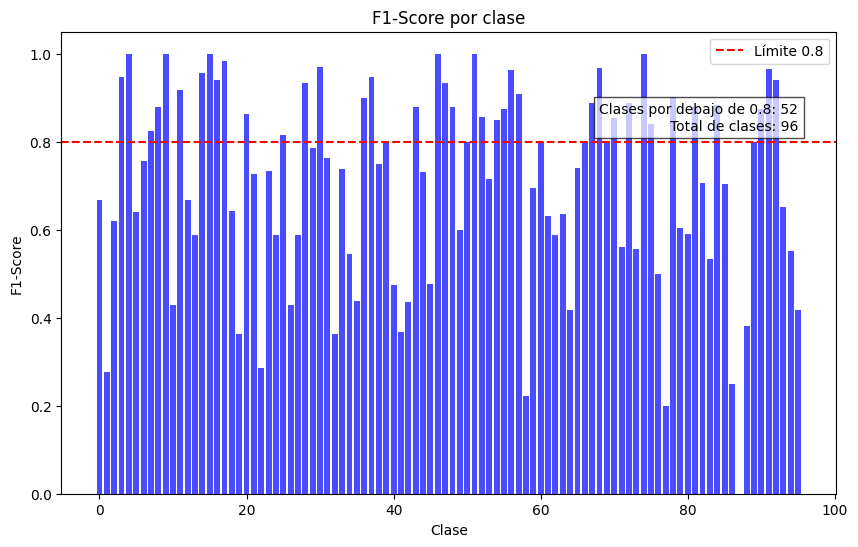

In [675]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Obtener el F1-Score para cada clase
f1_per_class = f1_score(y_test, y_pred_classes_2, average=None)

# Definir el valor de corte (0.8) y contar cuántas clases están por debajo de ese valor
threshold = 0.8
below_threshold = np.sum(f1_per_class < threshold)
total_classes = len(f1_per_class)

# Graficar F1-Score para cada clase
plt.figure(figsize=(10, 6))
plt.bar(np.arange(total_classes), f1_per_class, color='blue', alpha=0.7)

# Agregar una línea punteada en el valor 0.8
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Límite 0.8')

# Mostrar el número de clases debajo del umbral en el gráfico
plt.text(total_classes - 1, threshold + 0.02, f'Clases por debajo de {threshold}: {below_threshold}\nTotal de clases: {total_classes}', 
         verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Configurar el gráfico
plt.xlabel('Clase')
plt.ylabel('F1-Score')
plt.title('F1-Score por clase')
plt.legend()

# Mostrar el gráfico
plt.show()


### LSTM word2vec

In [676]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Asumiendo que 'data_filtrada' es tu dataframe
def prepare_med2vec_data(data):
    # Concatenar diagnósticos y procedimientos en una sola lista por paciente
    visits = []
    for index, row in data.iterrows():
        # Obtener códigos de diagnósticos
        diag_codes = []
        diag_cols = [col for col in data.columns if 'Diag' in col]
        for col in diag_cols:
            code = row[col]
            if pd.notnull(code):
                diag_codes.append(str(code))
        
        # Obtener códigos de procedimientos
        proc_codes = []
        proc_cols = [col for col in data.columns if 'Proced' in col]
        for col in proc_cols:
            code = row[col]
            if pd.notnull(code):
                proc_codes.append(str(code))
        
        # Combinar diagnósticos y procedimientos
        codes = diag_codes + proc_codes
        visits.append(codes)
    
    return visits

# Preparar los datos para Med2Vec
med2vec_data = prepare_med2vec_data(data_filtrada_clean.copy())


In [677]:
from gensim.models import Word2Vec

# Entrenar el modelo Word2Vec
embedding_size = 128  # Dimensión de los embeddings
window_size = 5       # Tamaño de la ventana de contexto
min_count = 1         # Mínimo de frecuencia para considerar una palabra
workers = 4           # Número de hilos de entrenamiento

med2vec_model = Word2Vec(
    sentences=med2vec_data,
    vector_size=embedding_size,
    window=window_size,
    min_count=min_count,
    workers=workers,
    sg=1  # Usar skip-gram
)


In [678]:
# Crear vocabulario de códigos
all_codes = list(med2vec_model.wv.index_to_key)
code_to_index = {code: idx for idx, code in enumerate(all_codes, start=1)}  # Empezamos en 1 porque 0 será para padding
index_to_code = {idx: code for code, idx in code_to_index.items()}

# Tamaño del vocabulario
vocab_size = len(code_to_index) + 1  # +1 por el índice 0 reservado para padding

# Crear la matriz de embeddings
embedding_matrix = np.zeros((vocab_size, embedding_size))
for code, idx in code_to_index.items():
    embedding_vector = med2vec_model.wv[code]
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector


In [679]:
def preprocess_data_med2vec(data, code_to_index):
    # --- Separar las columnas de interés ---
    diag_principal_col = 'Diag 01 Principal (cod+des)'
    proc_principal_col = 'Proced 01 Principal (cod+des)'
    
    diag_secundarios_cols = [col for col in data.columns if 'Diag' in col and 'Principal' not in col]
    proc_secundarios_cols = [col for col in data.columns if 'Proced' in col and 'Principal' not in col]
    
    # --- Convertir códigos a índices ---
    def code_to_idx(code):
        return code_to_index.get(str(code), 0)  # 0 para códigos desconocidos o padding
    
    # Diagnóstico principal
    data['diag_principal_idx'] = data[diag_principal_col].apply(code_to_idx)
    
    # Procedimiento principal
    data['proc_principal_idx'] = data[proc_principal_col].apply(code_to_idx)
    
    # Diagnósticos secundarios
    diag_sec_idxs = []
    for col in diag_secundarios_cols:
        data[col] = data[col].fillna('0').astype(str)
        data[col] = data[col].apply(code_to_idx)
        diag_sec_idxs.append(data[col])
    diag_secundarios = np.stack(diag_sec_idxs, axis=1)
    
    # Procedimientos secundarios
    proc_sec_idxs = []
    for col in proc_secundarios_cols:
        data[col] = data[col].fillna('0').astype(str)
        data[col] = data[col].apply(code_to_idx)
        proc_sec_idxs.append(data[col])
    proc_secundarios = np.stack(proc_sec_idxs, axis=1)
    
    # Variable objetivo (GRD)
    grd_encoder = LabelEncoder()
    grd_labels = grd_encoder.fit_transform(data['GRD'])
    
    # Extraer índices de diagnósticos y procedimientos principales
    diag_principal = data['diag_principal_idx'].values
    proc_principal = data['proc_principal_idx'].values
    
    return diag_principal, proc_principal, diag_secundarios, proc_secundarios, grd_labels, grd_encoder

# Aplicar preprocesamiento
diag_principal, proc_principal, diag_secundarios, proc_secundarios, grd_labels, grd_encoder = preprocess_data_med2vec(data_filtrada_clean.copy(), code_to_index)


In [680]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant

# Parámetros del modelo
embedding_dim = embedding_size  # Usamos la misma dimensión de embeddings que Med2Vec
lstm_units = 64
NUM_CLASSES = len(np.unique(grd_labels))

# Entrada de diagnóstico principal
diag_principal_input = Input(shape=(1,), name="diag_principal_input")
diag_principal_embedding = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=True  # Congelamos los embeddings preentrenados
)(diag_principal_input)
diag_principal_flat = tf.keras.layers.Flatten()(diag_principal_embedding)

# Entrada de procedimiento principal
proc_principal_input = Input(shape=(1,), name="proc_principal_input")
proc_principal_embedding = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=True
)(proc_principal_input)
proc_principal_flat = tf.keras.layers.Flatten()(proc_principal_embedding)

# Entrada de diagnósticos secundarios
diag_secundarios_input = Input(shape=(diag_secundarios.shape[1],), name="diag_secundarios_input")
diag_secundarios_embedding = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=True,
    mask_zero=True
)(diag_secundarios_input)
diag_secundarios_lstm = LSTM(lstm_units)(diag_secundarios_embedding)

# Entrada de procedimientos secundarios
proc_secundarios_input = Input(shape=(proc_secundarios.shape[1],), name="proc_secundarios_input")
proc_secundarios_embedding = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=True,
    mask_zero=True
)(proc_secundarios_input)
proc_secundarios_lstm = LSTM(lstm_units)(proc_secundarios_embedding)

# Concatenar las salidas
concatenated = Concatenate()([diag_principal_flat, proc_principal_flat, diag_secundarios_lstm, proc_secundarios_lstm])

# Capas densas y de salida
x = Dropout(0.5)(concatenated)
x = Dense(128, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Compilar el modelo
model3 = Model(inputs=[diag_principal_input, proc_principal_input, diag_secundarios_input, proc_secundarios_input], outputs=output)
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model3.summary()




Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ diag_principal_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ proc_principal_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_secundarios_i… │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ proc_secundarios_i… │ (None, 29)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_96        │ (None, 1, 128)    │    459,008 │ diag_principal_i… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_97        │ (None, 1, 128)    │    459,008 │ proc_principal_i… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_98        │ (None, 34, 128)   │    459,008 │ diag_secundarios… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_38        │ (None, 34)        │          0 │ diag_secundarios… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_99        │ (None, 29, 128)   │    459,008 │ proc_secundarios… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_39        │ (None, 29)        │          0 │ proc_secundarios… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_18          │ (None, 128)       │          0 │ embedding_96[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_19          │ (None, 128)       │          0 │ embedding_97[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_78 (LSTM)      │ (None, 64)        │     49,408 │ embedding_98[0][… │
│                     │                   │            │ not_equal_38[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_79 (LSTM)      │ (None, 64)        │     49,408 │ embedding_99[0][… │
│                     │                   │            │ not_equal_39[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_29      │ (None, 384)       │          0 │ flatten_18[0][0], │
│ (Concatenate)       │                   │            │ flatten_19[0][0], │
│                     │                   │            │ lstm_78[0][0],    │
│                     │                   │            │ lstm_79[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 384)       │          0 │ concatenate_29[0… │
│ (Dropout)           │                   │            │                 

 Total params: 1,996,512 (7.62 MB)

 Trainable params: 1,996,512 (7.62 MB)

 Non-trainable params: 0 (0.00 B)

In [681]:
from sklearn.model_selection import train_test_split

X_train_diag_principal, X_test_diag_principal, X_train_proc_principal, X_test_proc_principal, \
X_train_diag_sec, X_test_diag_sec, X_train_proc_sec, X_test_proc_sec, y_train, y_test = train_test_split(
    diag_principal, proc_principal, diag_secundarios, proc_secundarios, grd_labels, test_size=0.2, random_state=42, stratify=grd_labels
)


In [682]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping3 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [683]:
history3 = model3.fit(
    [X_train_diag_principal, X_train_proc_principal, X_train_diag_sec, X_train_proc_sec],
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32, callbacks=[early_stopping3]
)


Epoch 1/20


c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['diag_principal_input', 'proc_principal_input', 'diag_secundarios_input', 'proc_secundarios_input']. Received: the structure of inputs=('*', '*', '*', '*')
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - accuracy: 0.2596 - loss: 3.3552 - val_accuracy: 0.5266 - val_loss: 1.6334
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.5757 - loss: 1.5003 - val_accuracy: 0.7155 - val_loss: 0.9566
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.7469 - loss: 0.8802 - val_accuracy: 0.8208 - val_loss: 0.6173
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8657 - loss: 0.5263 - val_accuracy: 0.8632 - val_loss: 0.4862
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.9115 - loss: 0.3381 - val_accuracy: 0.8872 - val_loss: 0.4122
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.9432 - loss: 0.2262 - val_accuracy: 0.9033 - val_loss: 0.3728
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.9545 - loss: 0.1836 - val_accuracy: 0.9096 - val_loss: 0.3633
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.9707 - loss: 0.1270 - val_accurac

In [684]:
test_loss, test_acc = model3.evaluate(
    [X_test_diag_principal, X_test_proc_principal, X_test_diag_sec, X_test_proc_sec],
    y_test
)
print(f"Test Accuracy: {test_acc:.4f}")


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9230 - loss: 0.3394
Test Accuracy: 0.9267


In [685]:
# Predecir las etiquetas para el conjunto de prueba
y_pred_3 = model3.predict([X_test_diag_principal, X_test_proc_principal, X_test_diag_sec, X_test_proc_sec])

# Convertir las probabilidades predichas en clases
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)

# AUC/ROC: Para multiclase, se hace "one-vs-rest"
# y_test_binarized = label_binarize(y_test, classes=np.arange(NUM_CLASSES))  # Binarizar etiquetas para calcular AUC por clase
# auc = roc_auc_score(y_test_binarized, y_pred_3, average='macro', multi_class='ovr')

precision_macro3, recall_macro3, fscore_macro3, x=precision_recall_fscore_support(y_test, y_pred_classes_3, average='weighted', zero_division=0.0)

# # Mostrar las métricas
# print(f"Precision (Weighted): {precision:.4f}")
# print(f"F1-Score (Weighted): {f1:.4f}")
# print(f"AUC-ROC (Weighted): {auc:.4f}")
# print(f"Recall (Weighted): {recall:.4f}")

print(f"Presición (weighted): {precision_macro3:.4f}")
print(f"Recall (weighted): {recall_macro3:.4f}")
print(f"FScore (weighted): {fscore_macro3:.4f}")

compara_rendimiento['model3']=[precision_macro3,recall_macro3,fscore_macro3]


69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
Presición (weighted): 0.9309
Recall (weighted): 0.9267
FScore (weighted): 0.9259


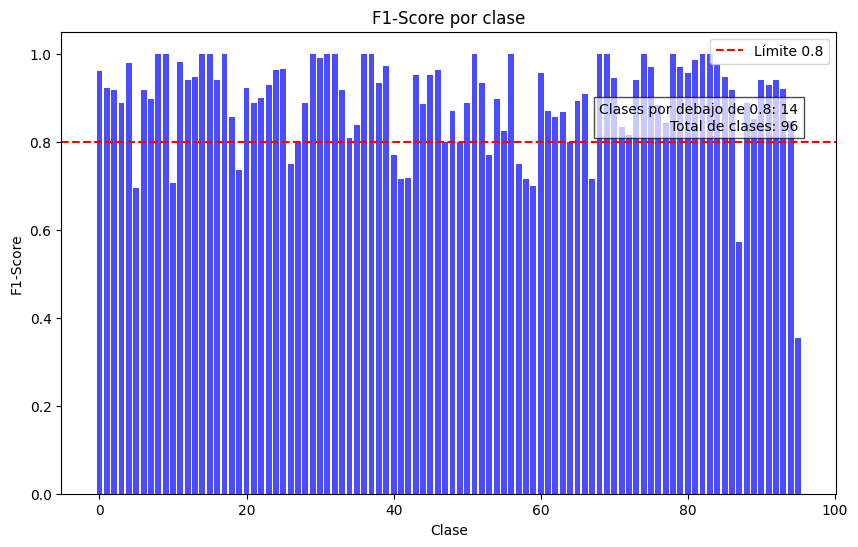

In [686]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Obtener el F1-Score para cada clase
f1_per_class = f1_score(y_test, y_pred_classes_3, average=None)

# Definir el valor de corte (0.8) y contar cuántas clases están por debajo de ese valor
threshold = 0.8
below_threshold = np.sum(f1_per_class < threshold)
total_classes = len(f1_per_class)

# Graficar F1-Score para cada clase
plt.figure(figsize=(10, 6))
plt.bar(np.arange(total_classes), f1_per_class, color='blue', alpha=0.7)

# Agregar una línea punteada en el valor 0.8
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Límite 0.8')

# Mostrar el número de clases debajo del umbral en el gráfico
plt.text(total_classes - 1, threshold + 0.02, f'Clases por debajo de {threshold}: {below_threshold}\nTotal de clases: {total_classes}', 
         verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Configurar el gráfico
plt.xlabel('Clase')
plt.ylabel('F1-Score')
plt.title('F1-Score por clase')
plt.legend()

# Mostrar el gráfico
plt.show()


In [717]:
compara_rendimiento['Metricas (Weighted)']=['Presición','Recall','Fscore']
compara_rendimiento

,model1,model2,model3,Metricas (Weighted)
0,0.444903,0.782863,0.930939,Presición
1,0.483974,0.778846,0.926740,Recall
2,0.444434,0.770883,0.925922,Fscore


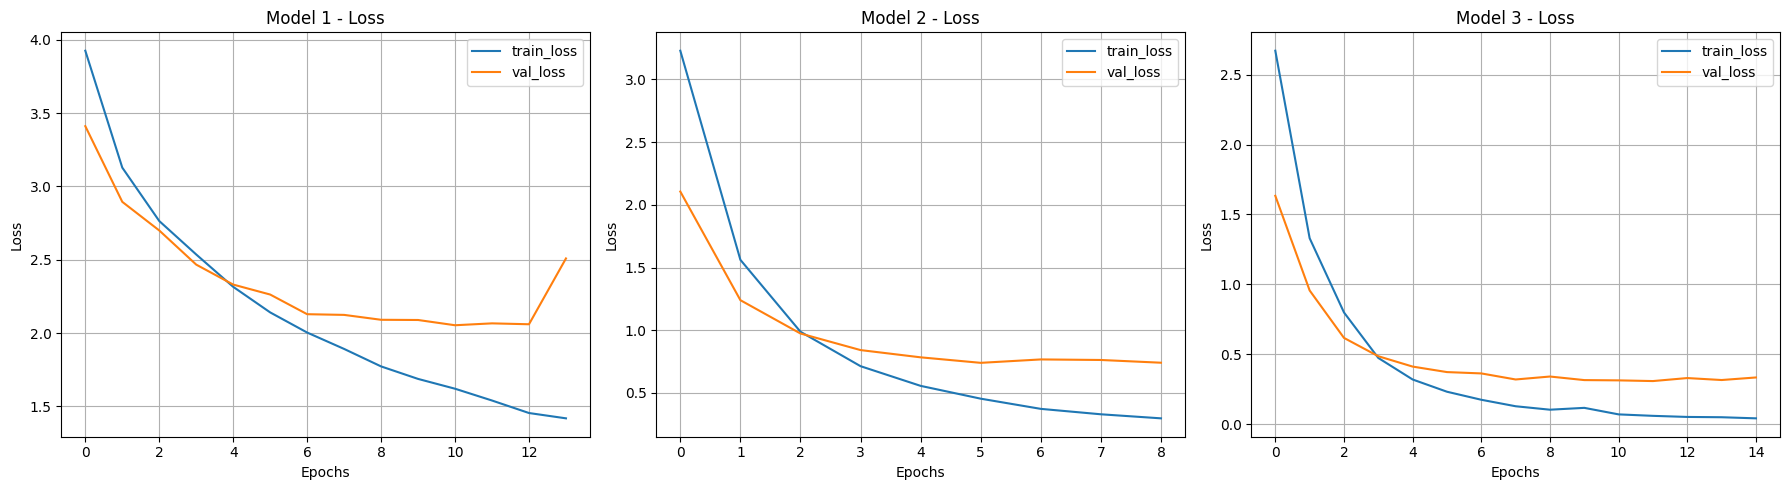

In [688]:
import matplotlib.pyplot as plt

# Asumiendo que tienes los historiales de entrenamiento de los modelos
# 'history1', 'history2', 'history3' contienen los historiales de entrenamiento de los modelos

def plot_loss(history, ax, title):
    ax.plot(history.history['loss'], label='train_loss')
    ax.plot(history.history['val_loss'], label='val_loss')
    ax.set_title(title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

# Crear la figura con 3 gráficos uno al lado del otro
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Graficar las pérdidas de cada modelo
plot_loss(history, ax1, 'Model 1 - Loss')
plot_loss(history2, ax2, 'Model 2 - Loss')
plot_loss(history3, ax3, 'Model 3 - Loss')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()
